In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
titanic = pd.read_csv(r'C:\Users\psahi\OneDrive\Desktop\ASSIGNMENT\ML\ML_C2\train.csv')

In [105]:
titanic.duplicated().sum()

0

In [106]:
titanic.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [107]:
titanic.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<AxesSubplot:>

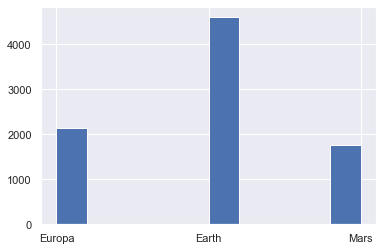

In [108]:
titanic['HomePlanet'].hist()

In [109]:
titanic.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [110]:
titanic['Transported']=titanic['Transported'].apply(lambda x: 1 if x==True else 0)

<AxesSubplot:xlabel='CryoSleep', ylabel='Transported'>

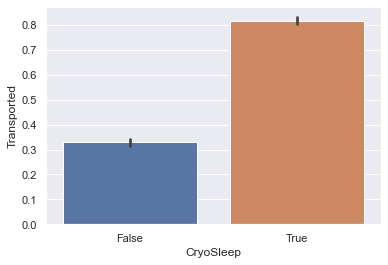

In [111]:
sns.barplot(data=titanic, x='CryoSleep', y='Transported')

<AxesSubplot:xlabel='VIP', ylabel='Transported'>

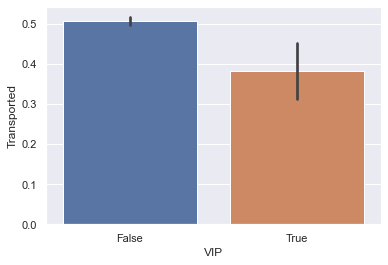

In [112]:
sns.barplot(data=titanic, x='VIP', y='Transported')

In [113]:
titanic['CryoSleep']=titanic['CryoSleep'].apply(lambda x: 3 if x == True else 0)
titanic['VIP'] = titanic['VIP'].apply(lambda x: 1 if x == False else 0)

In [114]:
txt='A/0/S'
txt.split('/')[1]

'0'

In [115]:
titanic['Cabin']=titanic['Cabin'].astype(str)
titanic['CabinDeck']=titanic['Cabin'].apply(lambda x: x.split('/')[0])

In [116]:
titanic['Cabin_ver']=titanic['Cabin'].apply(lambda x: len(x))

<AxesSubplot:>

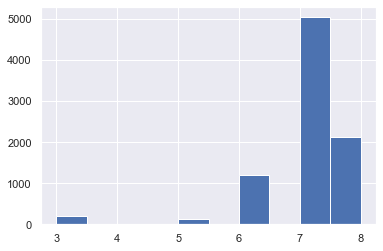

In [117]:
titanic['Cabin_ver'].hist()

In [118]:
cabin_nan= titanic[titanic['Cabin_ver']==3]

<AxesSubplot:xlabel='Cabin_ver', ylabel='Transported'>

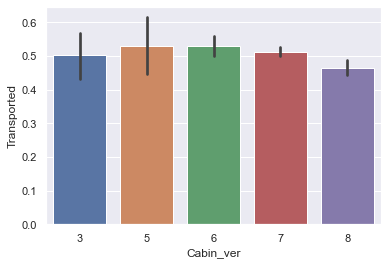

In [119]:
sns.barplot(data=titanic, x='Cabin_ver', y='Transported')

<AxesSubplot:>

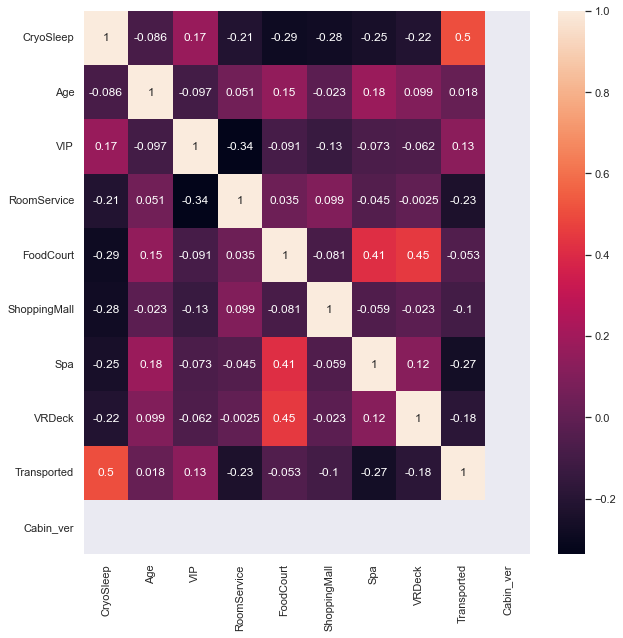

In [120]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cabin_nan.corr(), annot=True,ax=ax)

In [121]:
cabin_nan['VIP'].sum()

187

In [122]:
titanic['Cabin']=titanic['Cabin'].astype(str)
titanic['CabinDeck']=titanic['Cabin'].apply(lambda x: x if x == 'nan' else x.split('/')[0])
titanic['CabinNum']=titanic['Cabin'].apply(lambda x: x if x == 'nan' else x.split('/')[1])
titanic['CabinSide']=titanic['Cabin'].apply(lambda x: x if x == 'nan' else x.split('/')[2])

In [123]:
titanic['FoodCourt'].fillna(0,inplace=True)
titanic['RoomService'].fillna(0, inplace=True)
titanic['ShoppingMall'].fillna(0, inplace=True)
titanic['Spa'].fillna(0, inplace=True)
titanic['VRDeck'].fillna(0, inplace=True)

titanic['Total_spent']=titanic['RoomService']+titanic['FoodCourt']+titanic['ShoppingMall']+titanic['Spa']+titanic['VRDeck']

<AxesSubplot:xlabel='CabinSide', ylabel='Total_spent'>

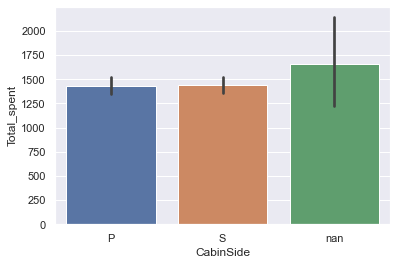

In [124]:
sns.barplot(data=titanic, x='CabinSide',y='Total_spent')

(0.0, 5000.0)

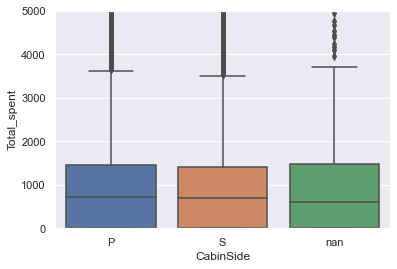

In [125]:
sns.boxplot(data=titanic, x='CabinSide',y='Total_spent')
plt.ylim(0,5000)

In [126]:
titanic['CabinSide']=titanic['CabinSide'].apply(lambda x: 'other' if x=='nan' else x)

<AxesSubplot:xlabel='HomePlanet', ylabel='Total_spent'>

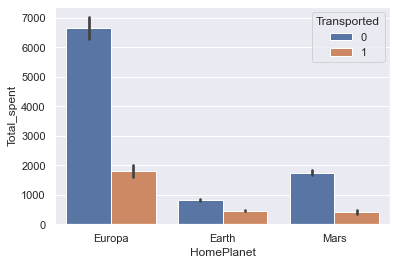

In [127]:
sns.barplot(data=titanic, x='HomePlanet',y='Total_spent',hue='Transported')

In [128]:
titanic['Name'].fillna('other other', inplace=True)

titanic['name']=titanic['Name'].apply(lambda x: x.split(' ')[0])
titanic['last_name']=titanic['Name'].apply(lambda x: x.split(' ')[1])

<AxesSubplot:xlabel='Transported', ylabel='Total_spent'>

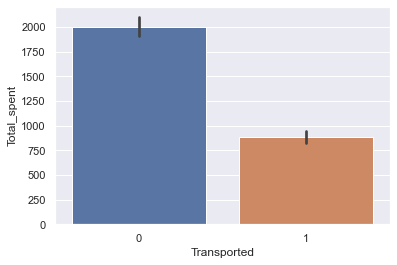

In [129]:
sns.barplot(data=titanic, x='Transported',y='Total_spent')

<AxesSubplot:>

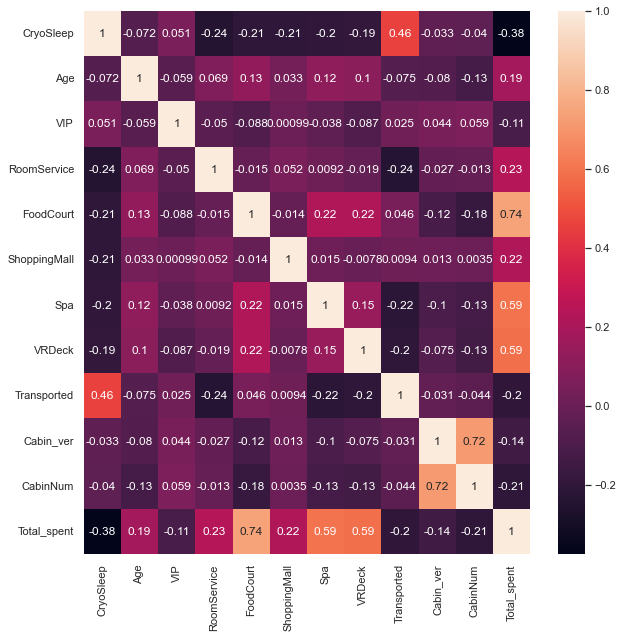

In [130]:
titanic['CabinNum']=titanic['CabinNum'].apply(lambda x: 0 if x=='nan' else x)
titanic['CabinNum']=titanic['CabinNum'].astype(int)

plt.figure(figsize=(10,10))
sns.heatmap(titanic.corr(), annot=True)

In [131]:
cabin_dict={'other':0, 'P':1,'S':2}
titanic['CabinSide']=titanic['CabinSide'].apply(lambda x: cabin_dict.get(x))

<AxesSubplot:xlabel='CabinDeck', ylabel='Count'>

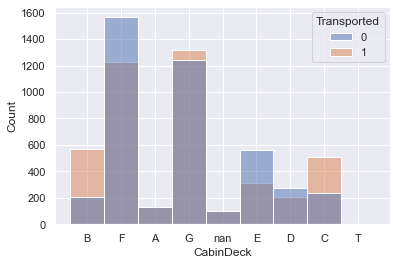

In [132]:
sns.histplot(data=titanic, x='CabinDeck', hue='Transported')

In [133]:
deck_dict={'T':0, 'nan':1,'A':2, 'D':3, 'E':4, 'C':5, 'B':6, 'F':7, 'G':8}
titanic['CabinDeck']=titanic['CabinDeck'].apply(lambda x: deck_dict.get(x))

In [134]:
titanic.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,CabinDeck,Cabin_ver,CabinNum,CabinSide,Total_spent,name,last_name
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,1,0.0,0.0,0.0,...,0.0,Maham Ofracculy,0,6,5,0,1,0.0,Maham,Ofracculy
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,1,109.0,9.0,25.0,...,44.0,Juanna Vines,1,7,5,0,2,736.0,Juanna,Vines


<AxesSubplot:xlabel='HomePlanet', ylabel='Count'>

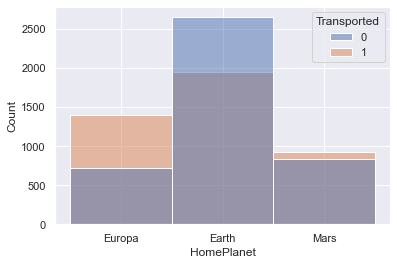

In [135]:
sns.histplot(data=titanic, x='HomePlanet',hue='Transported')

In [136]:
titanic['HomePlanet']=titanic['HomePlanet'].astype(str)
planets = titanic['HomePlanet'].unique()
planet_dict={ planets[0] : 3, planets[2]:2, planets[1]:1, 'nan':0}

<AxesSubplot:xlabel='Destination', ylabel='Total_spent'>

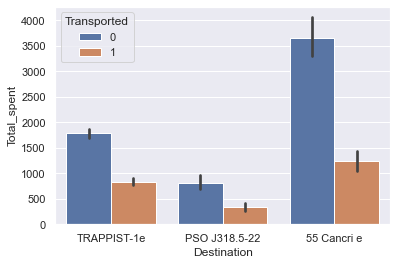

In [137]:
sns.barplot(data=titanic, x='Destination',y='Total_spent',hue='Transported')

In [138]:
planet_dict

{'Europa': 3, 'Mars': 2, 'Earth': 1, 'nan': 0}

In [139]:
titanic[titanic['HomePlanet']== 'nan']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,CabinDeck,Cabin_ver,CabinNum,CabinSide,Total_spent,name,last_name
59,0064_02,nan,3,E/3/S,TRAPPIST-1e,33.0,1,0.0,0.0,0.0,...,0.0,Colatz Keen,1,4,5,3,2,0.0,Colatz,Keen
113,0119_01,nan,0,A/0/P,TRAPPIST-1e,39.0,1,0.0,2344.0,0.0,...,6898.0,Batan Coning,0,2,5,0,1,9307.0,Batan,Coning
186,0210_01,nan,3,D/6/P,55 Cancri e,24.0,1,0.0,0.0,0.0,...,0.0,Arraid Inicont,1,3,5,6,1,0.0,Arraid,Inicont
225,0242_01,nan,0,F/46/S,TRAPPIST-1e,18.0,1,313.0,1.0,691.0,...,0.0,Almone Sté,0,7,6,46,2,1288.0,Almone,Sté
234,0251_01,nan,3,C/11/S,55 Cancri e,54.0,1,0.0,0.0,0.0,...,0.0,Diphah Amsive,1,5,6,11,2,0.0,Diphah,Amsive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,9084_01,nan,0,E/582/P,TRAPPIST-1e,25.0,1,1258.0,0.0,22.0,...,0.0,Jurs Mone,0,4,7,582,1,1299.0,Jurs,Mone
8613,9194_01,nan,0,E/603/S,55 Cancri e,53.0,1,0.0,4017.0,0.0,...,3147.0,other other,0,4,7,603,2,7177.0,other,other
8666,9248_01,nan,0,F/1792/S,55 Cancri e,38.0,0,28.0,1208.0,973.0,...,0.0,Gian Perle,1,7,8,1792,2,2416.0,Gian,Perle
8674,9257_01,nan,0,F/1892/P,TRAPPIST-1e,13.0,1,39.0,0.0,1085.0,...,0.0,Ties Apple,0,7,8,1892,1,1148.0,Ties,Apple


In [140]:
titanic['HomePlanet']=titanic['HomePlanet'].apply(lambda x: planet_dict.get(x))

In [141]:
titanic['Destination']=titanic['Destination'].astype(str)
titanic[titanic['Destination']=='nan']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,CabinDeck,Cabin_ver,CabinNum,CabinSide,Total_spent,name,last_name
47,0045_02,2,3,F/10/P,nan,19.0,1,0.0,0.0,0.0,...,0.0,Mass Chmad,1,7,6,10,1,0.0,Mass,Chmad
128,0138_02,1,0,E/5/P,nan,34.0,1,0.0,22.0,0.0,...,207.0,Monah Gambs,0,4,5,5,1,793.0,Monah,Gambs
139,0152_01,1,0,F/32/P,nan,41.0,1,0.0,0.0,0.0,...,607.0,Andan Estron,0,7,6,32,1,607.0,Andan,Estron
347,0382_01,0,0,G/64/P,nan,23.0,1,348.0,0.0,0.0,...,368.0,Blanie Floydendley,0,8,6,64,1,720.0,Blanie,Floydendley
430,0462_01,1,3,G/67/S,nan,50.0,1,0.0,0.0,0.0,...,0.0,Ronia Sosanturney,0,8,6,67,2,0.0,Ronia,Sosanturney
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,8956_02,1,3,G/1453/P,nan,20.0,1,0.0,0.0,0.0,...,0.0,Erina Bonnondry,1,8,8,1453,1,0.0,Erina,Bonnondry
8551,9130_01,2,3,F/1765/S,nan,41.0,1,0.0,0.0,0.0,...,0.0,Blers Corte,1,7,8,1765,2,0.0,Blers,Corte
8616,9195_02,2,3,F/1779/S,nan,33.0,1,0.0,0.0,0.0,...,0.0,Ceros Purle,1,7,8,1779,2,0.0,Ceros,Purle
8621,9197_02,3,0,C/308/P,nan,41.0,0,0.0,7964.0,0.0,...,5839.0,Aludram Platch,0,5,7,308,1,17041.0,Aludram,Platch


<AxesSubplot:xlabel='Destination', ylabel='Count'>

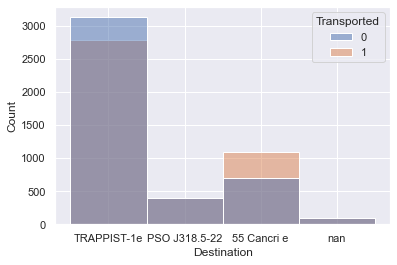

In [142]:
sns.histplot(data=titanic, x='Destination', hue='Transported')

In [143]:
titanic['Destination']=titanic['Destination'].astype(str)
destination = titanic['Destination'].unique()
dest_dict={ destination[3]:0, destination[1]:1, destination[0]:2, destination[2]:3}
titanic['Destination']=titanic['Destination'].apply(lambda x: dest_dict.get(x))

In [144]:
titanic['youth']=titanic['Age'].apply(lambda x: 1 if x<=21 else 0)
titanic['old']=titanic['Age'].apply(lambda x: 1 if x>=60 else 0)
titanic['middle_age']=titanic['Age'].apply(lambda x: 1 if x in range(21,60) else 0)
titanic['child']=titanic['Age'].apply(lambda x:1 if x<12 else 0)

In [145]:
titanic_age=titanic[['Transported','youth','middle_age','old','child']]
titanic_age.corr() 

,Transported,youth,middle_age,old,child
Transported,1.000000,0.069314,-0.079080,-0.012186,0.121599
youth,0.069314,1.000000,-0.804732,-0.117889,0.457138
middle_age,-0.079080,-0.804732,1.000000,-0.247246,-0.442698
old,-0.012186,-0.117889,-0.247246,1.000000,-0.053891
child,0.121599,0.457138,-0.442698,-0.053891,1.000000


In [146]:
titanic_age

,Transported,youth,middle_age,old,child
0,0,0,1,0,0
1,1,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,1,1,0,0,0
...,...,...,...,...,...
8688,0,0,1,0,0
8689,0,1,0,0,0
8690,1,0,1,0,0
8691,0,0,1,0,0


In [147]:
titanic_age=pd.melt(titanic_age, id_vars=['Transported'], value_vars=['youth','middle_age','old'])

<AxesSubplot:xlabel='variable', ylabel='Count'>

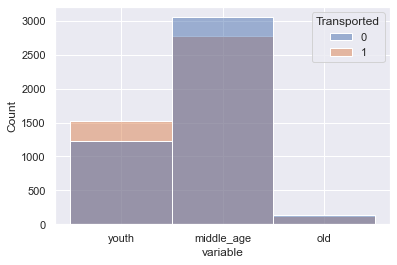

In [148]:
titanic_age=titanic_age[titanic_age['value']==1]
sns.histplot(data=titanic_age, x='variable', hue='Transported')

In [149]:
titanic['fam']=titanic['PassengerId'].apply(lambda x: x.split('_')[0])
titanic['pass_num']=titanic['PassengerId'].apply(lambda x: x.split('_')[1])
titanic['pass_num']=titanic['pass_num'].astype(int)

<AxesSubplot:xlabel='pass_num', ylabel='Count'>

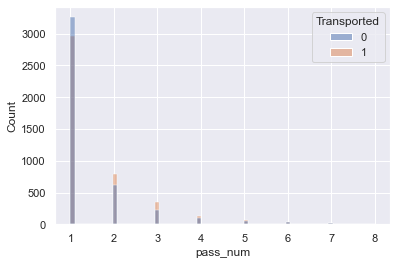

In [150]:
sns.histplot(data=titanic, x='pass_num', hue='Transported')

In [151]:
titanic['one']=1
fam_spent=titanic.groupby(['last_name','Transported'])[['one','Total_spent']].agg({np.sum,np.mean})

In [152]:
fam_spent.drop('other', axis=0, inplace=True)

<AxesSubplot:xlabel='sum', ylabel='mean'>

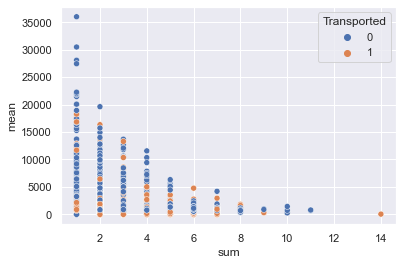

In [153]:
sns.scatterplot(data=fam_spent, x=fam_spent['one']['sum'], y=fam_spent['Total_spent']['mean'], hue='Transported')

In [154]:
titanic[titanic['last_name']=='Domington']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Total_spent,name,last_name,youth,old,middle_age,child,fam,pass_num,one
3058,3301_01,1,3,G/525/S,3,8.0,1,0.0,0.0,0.0,...,0.0,Tyle,Domington,1,0,0,1,3301,1,1
3059,3301_02,1,0,G/525/S,2,1.0,1,0.0,0.0,0.0,...,0.0,Tonald,Domington,1,0,0,1,3301,2,1
3060,3301_03,1,0,G/525/S,3,0.0,1,0.0,0.0,0.0,...,0.0,Yolace,Domington,1,0,0,1,3301,3,1
3061,3301_04,1,0,G/525/S,2,20.0,1,0.0,0.0,0.0,...,0.0,Lulah,Domington,1,0,0,0,3301,4,1
4556,4847_01,1,0,F/917/S,2,19.0,1,0.0,0.0,699.0,...,803.0,Blancy,Domington,1,0,0,0,4847,1,1
5441,5812_01,1,3,G/943/S,2,0.0,1,0.0,0.0,0.0,...,0.0,Holey,Domington,1,0,0,1,5812,1,1
5442,5812_02,1,0,G/943/S,2,3.0,1,0.0,0.0,0.0,...,0.0,Garry,Domington,1,0,0,1,5812,2,1
5443,5812_03,1,3,G/943/S,2,12.0,1,0.0,0.0,0.0,...,0.0,Evaned,Domington,1,0,0,0,5812,3,1
5444,5812_04,1,3,G/943/S,2,2.0,1,0.0,0.0,0.0,...,0.0,Ireen,Domington,1,0,0,1,5812,4,1
5445,5812_05,1,3,G/943/S,2,41.0,1,0.0,0.0,0.0,...,0.0,Dian,Domington,0,0,1,0,5812,5,1


In [155]:
highnumcabin=titanic[titanic['CabinNum']>500]

(0.0, 5000.0)

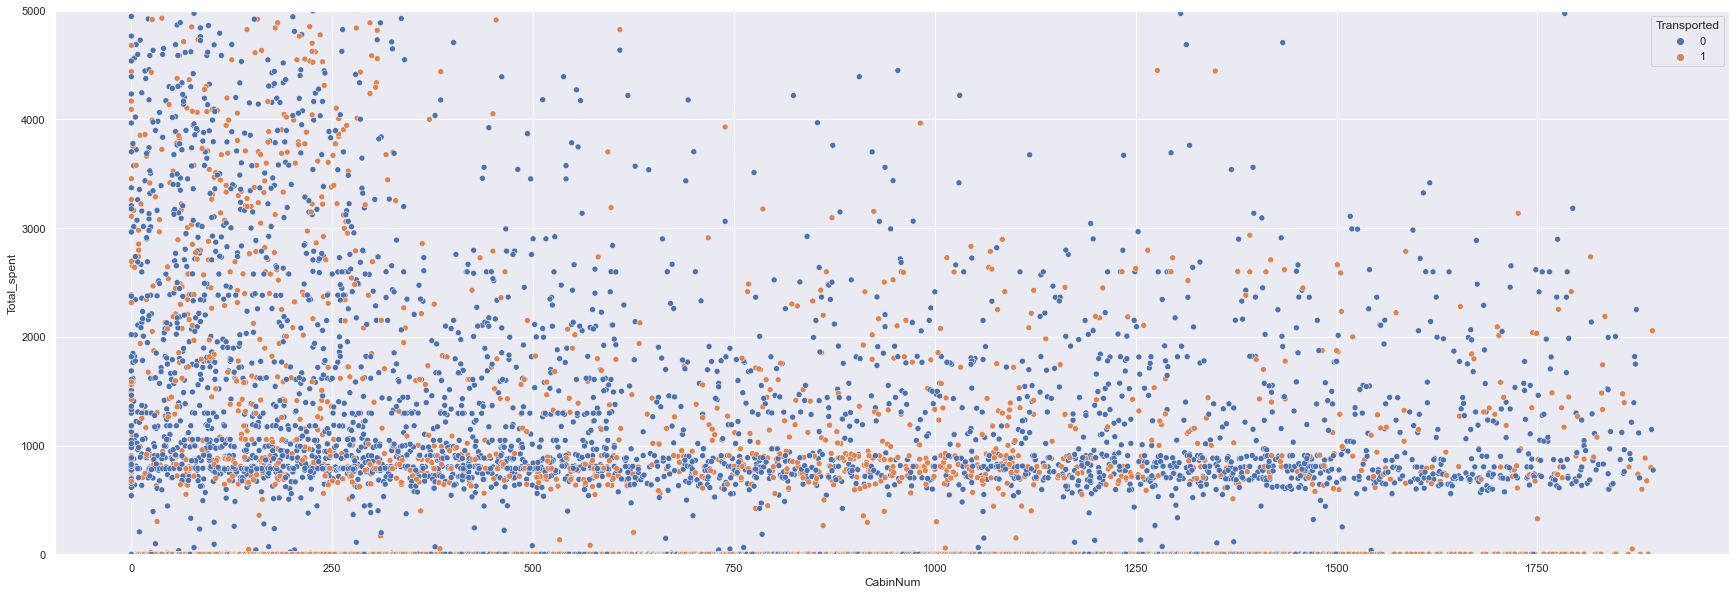

In [156]:
plt.figure(figsize=(30,10))
sns.scatterplot(data=titanic, x='CabinNum', y='Total_spent', hue='Transported')
plt.ylim(0,5000)
#plt.xlim(0,350)

In [157]:
titanic['spent0']=titanic['Total_spent'].apply(lambda x: 1 if x == 0 else 0)

In [158]:
titanic['CabinNum2']=titanic['CabinNum'].apply(lambda x: 1 if x< 550 else (2 if x in range(900, 1100) else 0))

In [159]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8693 non-null   int64  
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   int64  
 5   Age           8514 non-null   float64
 6   VIP           8693 non-null   int64  
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   int64  
 14  CabinDeck     8693 non-null   int64  
 15  Cabin_ver     8693 non-null   int64  
 16  CabinNum      8693 non-null   int32  
 17  CabinSide     8693 non-null   int64  
 18  Total_spent   8693 non-null 

In [160]:
titanic.drop(columns=['PassengerId','Cabin','Name','last_name','name','one','Cabin_ver'], inplace=True)

In [161]:
from sklearn.preprocessing import MinMaxScaler
#cols_for_scale= ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total_spent','fam','Age','CabinNum','Total_spent_mean']
cols_for_scale= ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total_spent','fam','Age','CabinNum']
scaler=MinMaxScaler()
scaled= scaler.fit_transform(titanic[cols_for_scale])

In [162]:
titanic[cols_for_scale]=scaled

In [163]:
titanic.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'CabinDeck', 'CabinNum', 'CabinSide', 'Total_spent', 'youth', 'old',
       'middle_age', 'child', 'fam', 'pass_num', 'spent0', 'CabinNum2'],
      dtype='object')

In [164]:
titanic['Transported']=titanic['Transported'].apply(lambda x: 1 if x==True else 0)

In [165]:
from sklearn.model_selection import train_test_split

train_data, val_data, train_labels, val_labels = train_test_split(titanic.drop(columns=['Transported']), titanic['Transported'],
                                                                         test_size=.2, random_state=13,
                                                                 shuffle=True)

In [166]:
val_data.fillna(0,inplace=True)

In [168]:
from pandas._libs.hashtable import mode
from xgboost import XGBClassifier

xg_params={'booster':['dart', 'gbtree'],
           'eta':np.linspace(0,1,num=25),
           'max_depth': range(10,50)  
}

In [169]:
model= XGBClassifier(booster='dart',eta=0.05, max_depth=10)
model.fit(train_data, train_labels, eval_set=[(val_data, val_labels)])

[22:34:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.67025
[1]	validation_0-logloss:0.64974
[2]	validation_0-logloss:0.63158
[3]	validation_0-logloss:0.61430
[4]	validation_0-logloss:0.59828


C:\Users\psahi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\psahi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-logloss:0.58342
[6]	validation_0-logloss:0.57060
[7]	validation_0-logloss:0.55797
[8]	validation_0-logloss:0.54709
[9]	validation_0-logloss:0.53669
[10]	validation_0-logloss:0.52708
[11]	validation_0-logloss:0.51782
[12]	validation_0-logloss:0.50975
[13]	validation_0-logloss:0.50166
[14]	validation_0-logloss:0.49462
[15]	validation_0-logloss:0.48789
[16]	validation_0-logloss:0.48196
[17]	validation_0-logloss:0.47626
[18]	validation_0-logloss:0.47086
[19]	validation_0-logloss:0.46562
[20]	validation_0-logloss:0.46082
[21]	validation_0-logloss:0.45640
[22]	validation_0-logloss:0.45228
[23]	validation_0-logloss:0.44850
[24]	validation_0-logloss:0.44467
[25]	validation_0-logloss:0.44113
[26]	validation_0-logloss:0.43781
[27]	validation_0-logloss:0.43492
[28]	validation_0-logloss:0.43211
[29]	validation_0-logloss:0.42952
[30]	validation_0-logloss:0.42701
[31]	validation_0-logloss:0.42500
[32]	validation_0-logloss:0.42300
[33]	validation_0-logloss:0.42121
[34]	validation_0-l

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.05, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.0500000007,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [174]:
predicted= model.predict(val_data)

In [175]:
from sklearn.metrics import confusion_matrix

confusion_matrix(val_labels,predicted)

array([[715, 165],
       [172, 687]], dtype=int64)

In [176]:
from sklearn.metrics import precision_score
precision_score(val_labels,predicted)

0.8063380281690141

In [177]:
pred=model.predict(val_data)
precision_score(val_labels,pred)

0.8063380281690141

In [178]:
confusion_matrix(val_labels, pred)

array([[715, 165],
       [172, 687]], dtype=int64)

In [179]:
titanic_test=pd.read_csv(r'C:\Users\psahi\OneDrive\Desktop\ASSIGNMENT\ML\ML_C2\test.csv')

In [180]:
def test_format(titanic):
  titanic['CryoSleep']=titanic['CryoSleep'].apply(lambda x: 3 if x == True else 0)
  titanic['VIP'] = titanic['VIP'].apply(lambda x: 1 if x == True else 0)

  titanic['Cabin']=titanic['Cabin'].astype(str)
  titanic['CabinDeck']=titanic['Cabin'].apply(lambda x: x.split('/')[0])
  #This should not affect
  #titanic['Cabin_ver']=titanic['Cabin'].apply(lambda x: len(x))


  titanic['Cabin']=titanic['Cabin'].astype(str)
  titanic['CabinDeck']=titanic['Cabin'].apply(lambda x: x if x == 'nan' else x.split('/')[0])
  titanic['CabinNum']=titanic['Cabin'].apply(lambda x: x if x == 'nan' else x.split('/')[1])
  titanic['CabinSide']=titanic['Cabin'].apply(lambda x: x if x == 'nan' else x.split('/')[2])

  titanic['FoodCourt'].fillna(0,inplace=True)
  titanic['RoomService'].fillna(0, inplace=True)
  titanic['ShoppingMall'].fillna(0, inplace=True)
  titanic['Spa'].fillna(0, inplace=True)
  titanic['VRDeck'].fillna(0, inplace=True)

  titanic['Total_spent']=titanic['RoomService']+titanic['FoodCourt']+titanic['ShoppingMall']+titanic['Spa']+titanic['VRDeck']

  titanic['CabinSide']=titanic['CabinSide'].apply(lambda x: 'other' if x=='nan' else x)

  titanic['Name'].fillna('other other', inplace=True)
  titanic['name']=titanic['Name'].apply(lambda x: x.split(' ')[0])
  titanic['last_name']=titanic['Name'].apply(lambda x: x.split(' ')[1])

  titanic['CabinNum']=titanic['CabinNum'].apply(lambda x: 0 if x=='nan' else x)
  titanic['CabinNum']=titanic['CabinNum'].astype(int)

  cabin_dict={'other':0, 'P':1,'S':2}
  titanic['CabinSide']=titanic['CabinSide'].apply(lambda x: cabin_dict.get(x))

  deck_dict={'T':0, 'nan':1,'A':2, 'D':3, 'E':4, 'C':5, 'B':6, 'F':7, 'G':8}
  titanic['CabinDeck']=titanic['CabinDeck'].apply(lambda x: deck_dict.get(x))

  titanic['HomePlanet']=titanic['HomePlanet'].astype(str)
  titanic['HomePlanet']=titanic['HomePlanet'].apply(lambda x: planet_dict.get(x))
  
  titanic['Destination']=titanic['Destination'].astype(str)
  titanic['Destination']=titanic['Destination'].apply(lambda x: dest_dict.get(x))

  titanic['youth']=titanic['Age'].apply(lambda x: 1 if x<=21 else 0)
  titanic['old']=titanic['Age'].apply(lambda x: 1 if x>=60 else 0)
  titanic['middle_age']=titanic['Age'].apply(lambda x: 1 if x in range(21,60) else 0)
  titanic['child']=titanic['Age'].apply(lambda x:1 if x<12 else 0)

  titanic['fam']=titanic['PassengerId'].apply(lambda x: x.split('_')[0])
  titanic['pass_num']=titanic['PassengerId'].apply(lambda x: x.split('_')[1])
  titanic['pass_num']=titanic['pass_num'].astype(int)

  titanic['spent0']=titanic['Total_spent'].apply(lambda x: 1 if x == 0 else 0)

  titanic['CabinNum2']=titanic['CabinNum'].apply(lambda x: 1 if x< 550 else (2 if x in range(900, 1100) else 0))

  titanic.drop(columns=['PassengerId','Cabin','Name','last_name','name'], inplace=True)

  scaled= scaler.transform(titanic[cols_for_scale])

  titanic[cols_for_scale]=scaled

  return titanic

In [181]:
test= test_format(titanic_test)

In [182]:
test=test[train_data.columns.to_list()]

In [183]:
submission=model.predict(test)

In [184]:
raw_test=pd.read_csv(r'C:\Users\psahi\OneDrive\Desktop\ASSIGNMENT\ML\ML_C2\test.csv')

In [185]:
raw_test['Transported']=submission

In [187]:
raw_test['Transported']=raw_test['Transported'].apply(lambda x: True if x==1 else False)

In [188]:
raw_test[['PassengerId','Transported']].to_csv('submission.csv', index=False)